### Experiment CNN on trap camera photos

The dataset gathered is a collection of 25 000 images from missouri wild life camera. The dataset can be found at: https://lila.science/datasets/missouricameratraps

In [1]:
from opFunctions import setupDataset
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
from helperFunctions import displayRandomImages

#### Setup the Test Data

In [2]:
targDir = "dataset/Set"

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor() 
])

lossFunction = nn.CrossEntropyLoss()

testData = setupDataset(targDir= targDir,
                        mode= "test",
                        transform=transform)

testDataLoader = DataLoader(dataset=testData,
                            batch_size=32,
                            shuffle=True)

In [3]:
classNames = testData.classes

### Show batch of the images

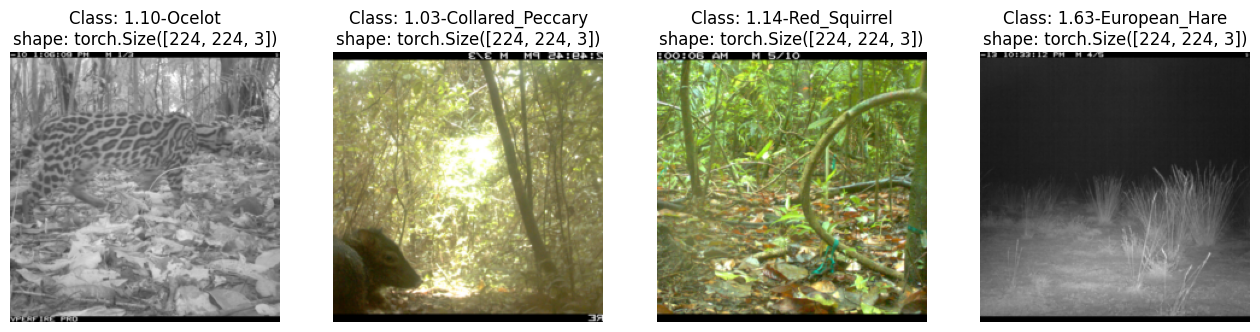

In [4]:
displayRandomImages(testData, classNames, 4)

### Model Specs 

In [5]:
from models import TinyVGGModel 
from torchinfo import summary

In [6]:
iteration1Model = TinyVGGModel(inputLayer=3,
                               hiddenLayer=16,
                               outputLayer=len(classNames))

In [7]:
modelDir = "modelsPT/ModITER1.pt"
iteration1Model.load_state_dict(torch.load(modelDir))

<All keys matched successfully>

In [8]:
iteration1Model

TinyVGGModel(
  (ConvLayer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (ConvLayer2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classiferLayer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=44944, out_features=20, bias=True)
  )
)

### Test the model

In [9]:
from opFunctions import testStep 
modelResults = testStep(iteration1Model, testDataLoader, lossFunction)
modelResults

(2.184070183680608, 39.42307692307692)

In [10]:
from helperFunctions import plotLossAndAccuracy

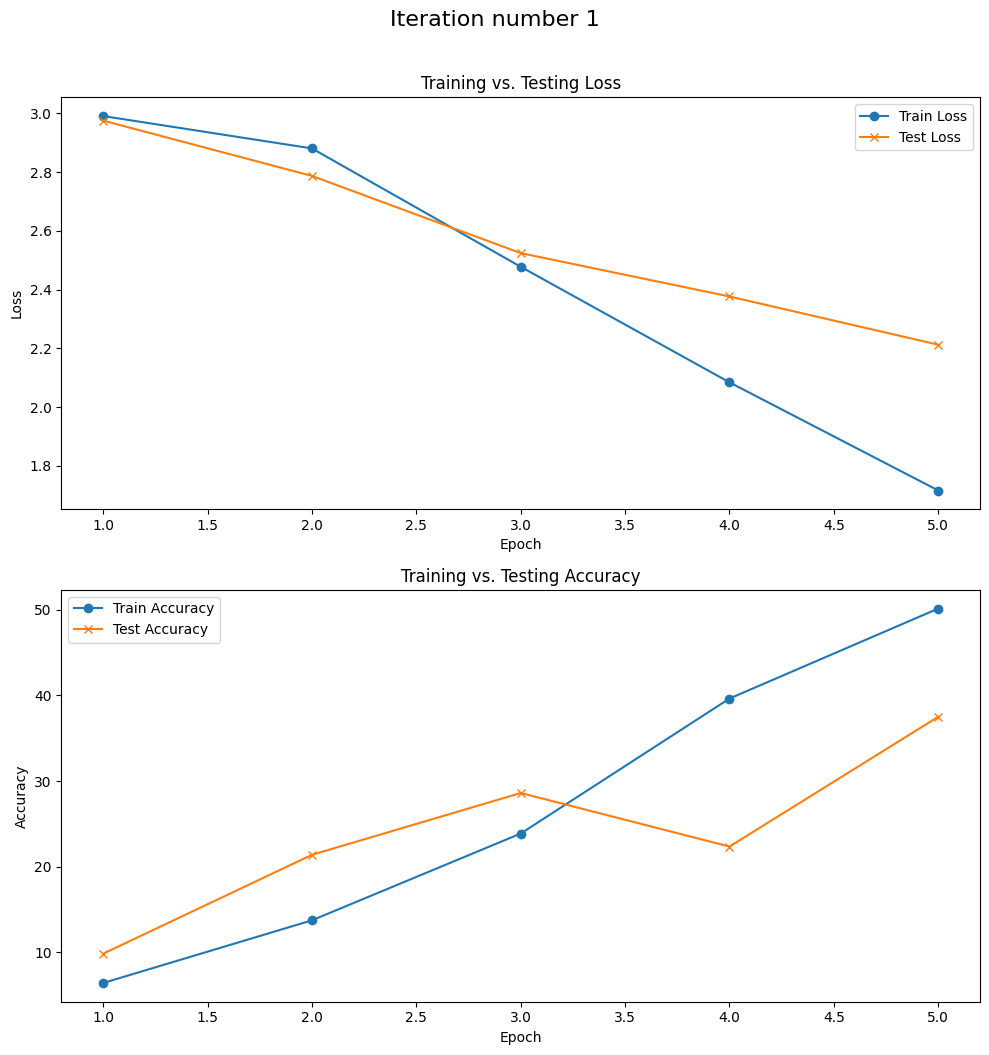

In [12]:
resultPath = "results/TrainingResults1.csv"
plotLossAndAccuracy(resultPath, 1)